In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# `SELECTING FEATURES & TARGET`
- X is the input (feature). It must be a 2D array shape (i.e., [['value1'], ['value2']]).
- Here we are using R&D Spend as the predictor.

In [7]:
X = df[['R&D Spend']]   # Independent variable (input)
y = df['Profit']        # Dependent variable (output)

### `Feature Scaling is NOT needed in SLR`
| Point                                                           | Explanation                                                                                                                                                                  |
| --------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Linear Regression doesn't use distance-based measures**    | Algorithms like KNN, SVM, K-Means depend on distance → they require scaling. Linear regression uses a **closed-form formula** (least squares).                               |
| **One feature = one scale**                                  | In simple linear regression, we’re only using `R&D Spend`. There’s no issue of one feature dominating another (which scaling solves in multivariate models).                 |
| **Scikit-learn handles scaling internally (to some extent)** | When using matrix operations, it still works accurately even if values are large or small, as long as they don’t overflow.                                                   |
| **Interpretability**                                         | Not scaling allows us to **understand coefficients in actual units** (e.g., “For every \$1K increase in R\&D Spend, profit increases by \$X”) — which is more interpretable. |


# `SPLITTING THE DATA`
Splits the data into training and testing sets:
- 80% data for training.
- 20% data for testing (test_size=0.2).

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# `CREATING AND TRAINING THE MODEL`

In [9]:
model = LinearRegression() # Create a Linear Regression model object

In [10]:
model.fit(X_train, y_train)
# Trains the model using the training data (X_train, y_train).
# The model learns the best-fit line using least squares method (minimizing error).

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# `PREDICTING RESULTS`

In [11]:
y_pred = model.predict(X_test)
# Uses the trained model to predict Profit values based on the X_test (R&D Spend in test set).
# Stores predictions in y_pred.

In [12]:
print("Slope (coefficient):", model.coef_[0])
# Prints the slope (m) of the regression line. 
# Tells how much Profit increases for every unit increase in R&D Spend.

Slope (coefficient): 0.8725465650732864


In [13]:
print("Intercept:", model.intercept_)
#  Prints the intercept (c)

Intercept: 47663.38224530556


# `Visualizing`

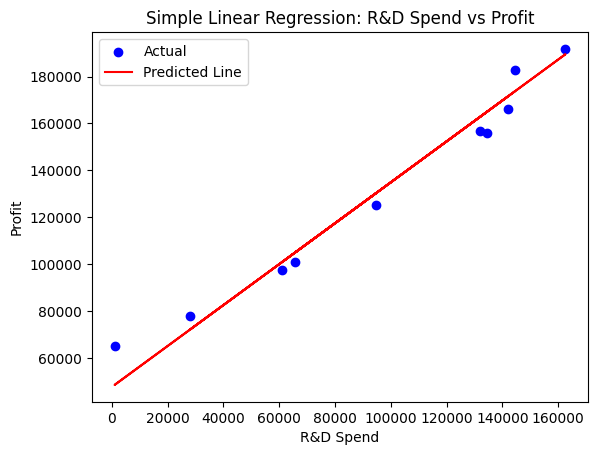

In [14]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
# Actual line

plt.plot(X_test, y_pred, color='red', label='Predicted Line')
# Recression line

plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Simple Linear Regression: R&D Spend vs Profit')
plt.legend()
plt.show()

# `Predict New Values`

In [21]:
new_rd_spend = np.array([[50000], [100000], [150000]])

In [18]:
# Predict profit using the trained model
predicted_profit = model.predict(new_rd_spend)

/Users/manharankaur/Desktop/Coding/Repository_AI_ML_DL/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
predicted_profit

array([ 91290.71049897, 134918.03875263, 178545.3670063 ])

In [19]:
for spend, profit in zip(new_rd_spend.flatten(), predicted_profit):
    print(f"R&D Spend: ₹{spend:,} => Predicted Profit: ₹{profit:,.2f}")

R&D Spend: ₹50,000 => Predicted Profit: ₹91,290.71
R&D Spend: ₹100,000 => Predicted Profit: ₹134,918.04
R&D Spend: ₹150,000 => Predicted Profit: ₹178,545.37
